In [1]:
import pandas as pd 
from sklearn.datasets import load_digits

dataset = load_digits()

In [2]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

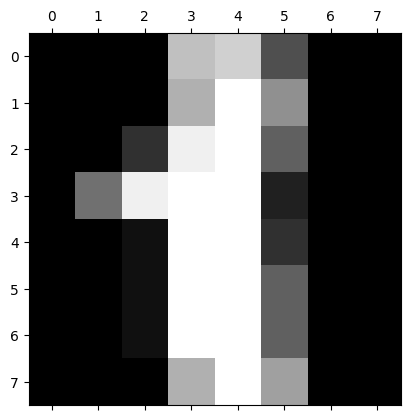

In [5]:
from matplotlib import pyplot as plt 
%matplotlib inline

plt.gray()
plt.matshow(dataset.data[1].reshape(8,8))

In [6]:
import numpy as np

np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
df= pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
X = df 
y = dataset.target

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=.2,random_state=2)

In [10]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.975

In [11]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

X_pca = pca.fit_transform(X)
X_pca.shape


(1797, 29)

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X_pca, y, test_size=.2,random_state=2)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9833333333333333

In [13]:
pca = PCA(n_components=12)

X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 12)

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X_pca, y, test_size=.2,random_state=2)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9666666666666667

ДОМАШНЕЕ ЗАДАНИЕ 

In [50]:
df = pd.read_csv("csv/heart.csv")
df['sex_1'] = df.Sex.apply(lambda x: 1 if x == 'M' else 0)

In [51]:
df.drop('Sex',inplace=True, axis='columns')

array([-2.6, -2. , -1.5, -1.1, -1. , -0.9, -0.8, -0.7, -0.5, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.8,  2.9,  3. ,  3.1,  3.2,  3.4,  3.5,
        3.6,  3.7,  3.8,  4. ,  4.2,  4.4,  5. ,  5.6,  6.2])

In [52]:
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,sex_1
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [57]:
df.shape

(918, 12)

In [56]:
df1.shape

(915, 12)

In [37]:
df1.shape

(915, 12)

In [58]:
df2 = df1[(df1.RestingBP>=(df1.RestingBP.mean()-3*df1.RestingBP.std())) 
    & (df1.RestingBP<=(df1.RestingBP.mean()+3*df1.RestingBP.std()))]

In [59]:
df2.shape

(907, 12)

In [66]:
df3 = df2[(df2.MaxHR>=(df2.MaxHR.mean()-3*df2.MaxHR.std())) 
    & (df2.MaxHR<=(df2.MaxHR.mean()+3*df2.MaxHR.std()))]
df3.shape

(906, 12)

In [64]:
df4 = df3[(df3.Oldpeak>=(df3.Oldpeak.mean()-3*df3.Oldpeak.std())) 
    & (df3.Oldpeak<=(df3.Oldpeak.mean()+3*df3.Oldpeak.std()))]

In [65]:
df4.shape

(899, 12)

In [68]:
df5 = df4.copy()
df4.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

df4.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

df4.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

df4.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,sex_1
0,40,ATA,140,289,0,1,172,0,0.0,3,0,1
1,49,NAP,160,180,0,1,156,0,1.0,2,1,0
2,37,ATA,130,283,0,2,98,0,0.0,3,0,1
3,48,ASY,138,214,0,1,108,1,1.5,2,1,0
4,54,NAP,150,195,0,1,122,0,0.0,3,0,1


In [73]:
df5 = pd.get_dummies(df4, drop_first=True)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,sex_1,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,0,1,0,1,0


In [74]:
X = df5.drop('HeartDisease',axis='columns')
y = df5.HeartDisease

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42815446,  0.46590022,  0.84963584, ...,  2.06332497,
        -0.5349047 , -0.22955001],
       [-0.47585532,  1.63471366, -0.16812204, ..., -0.48465463,
         1.86949191, -0.22955001],
       [-1.7455875 , -0.1185065 ,  0.79361247, ...,  2.06332497,
        -0.5349047 , -0.22955001],
       ...,
       [ 0.3706328 , -0.1185065 , -0.62564622, ..., -0.48465463,
        -0.5349047 , -0.22955001],
       [ 0.3706328 , -0.1185065 ,  0.35476274, ...,  2.06332497,
        -0.5349047 , -0.22955001],
       [-1.63977649,  0.34901888, -0.21480818, ..., -0.48465463,
         1.86949191, -0.22955001]])

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [88]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB(alpha=1)
model.fit(X_train,y_train,)

BernoulliNB(alpha=1)

In [89]:
model.score(X_test,y_test)

0.8666666666666667

In [114]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
model = BernoulliNB(alpha=1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8555555555555555